In [2]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

def normalize(list_to_process):
    array = np.array(list_to_process)
    normalized_arr = preprocessing.normalize([array])
    return normalized_arr[0]

df=pd.read_csv("Climate_Ready_Boston_Social_Vulnerability.csv")
df.head()

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.000000,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.382812,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.910156,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.007812,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.238281,3143.610637


In [3]:
name=df.groupby("Name").groups.keys()
df2=df.groupby("Name").sum()
df2=df2.drop(columns=["FID","GEOID10"])
df2.head()

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length
Name,,,,,,,,,,,,,
Allston,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082
Back Bay,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486
Bay Village,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535
Brighton,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776
Charlestown,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687


In [4]:
df2["POP100_RE_AVER"]=df2["POP100_RE"]/df2["AREA_SQFT"]

df2.head()

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_AVER
Name,,,,,,,,,,,,,,
Allston,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082,0.001688
Back Bay,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486,0.000840
Bay Village,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535,0.001155
Brighton,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776,0.000600
Charlestown,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687,0.000436


In [5]:
df2["POP100_RE_AVER"].nlargest(3)

Name
Allston        0.001688
West End       0.001414
Bay Village    0.001155
Name: POP100_RE_AVER, dtype: float64

<AxesSubplot:>

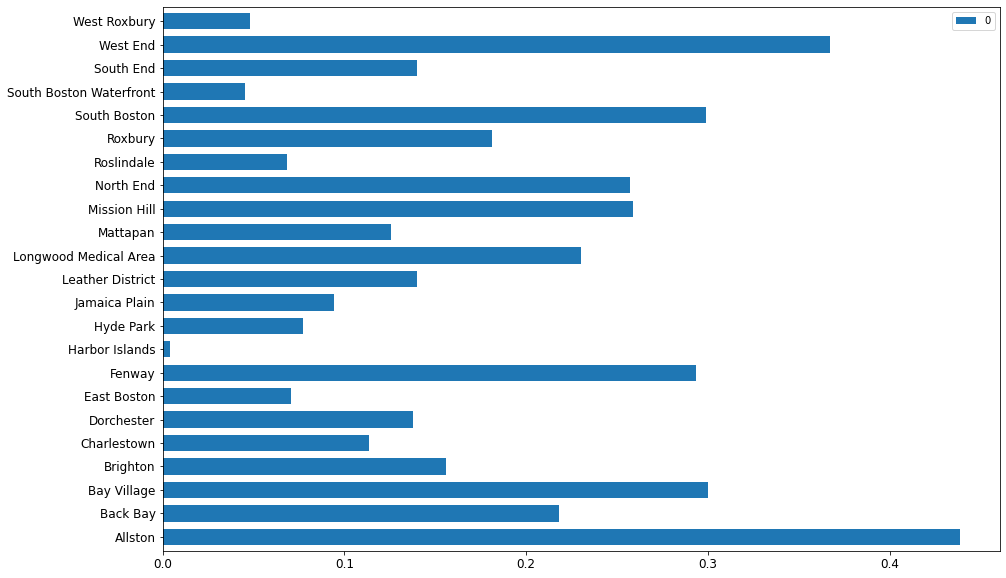

In [10]:
tmp=pd.DataFrame(normalize(df2["POP100_RE_AVER"].tolist()),index=name)
tmp.plot.barh(figsize=(15,10),fontsize="large",width=0.7)

In [12]:
df2["HU100_RE_AVER"]=df2["HU100_RE"]/df2["AREA_SQFT"]
df2.head()

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_AVER,HU100_RE_AVER
Name,,,,,,,,,,,,,,,
Allston,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082,0.001688,0.000850
Back Bay,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486,0.000840,0.000539
Bay Village,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535,0.001155,0.000541
Brighton,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776,0.000600,0.000268
Charlestown,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687,0.000436,0.000229


In [13]:
df2["HU100_RE_AVER"].nlargest(3)

Name
West End     0.000952
Allston      0.000850
North End    0.000622
Name: HU100_RE_AVER, dtype: float64

<AxesSubplot:>

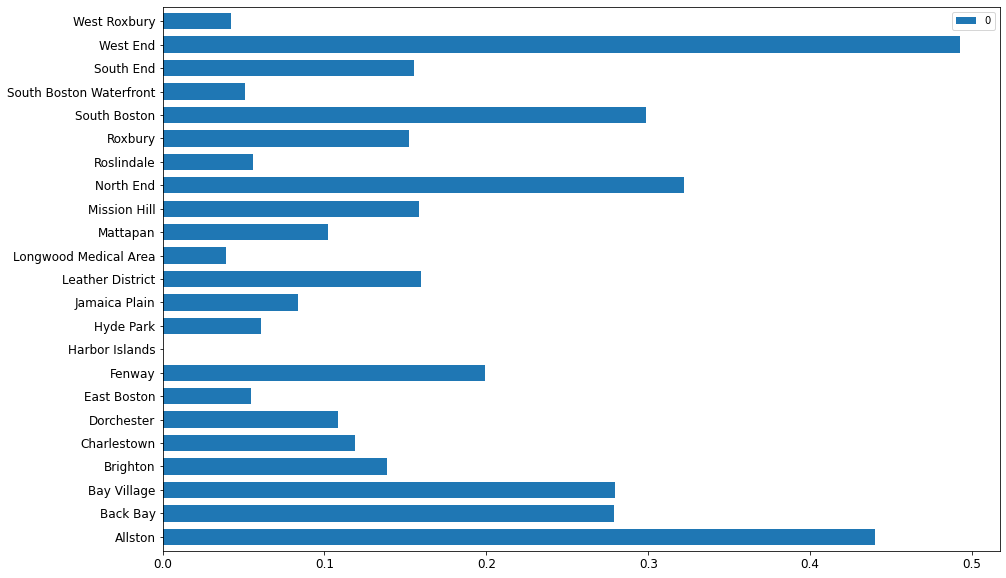

In [14]:
tmp=pd.DataFrame(normalize(df2["HU100_RE_AVER"].tolist()),index=name)
tmp.plot.barh(figsize=(15,10),fontsize="large",width=0.7)

In [15]:
df2["MedIllnes_AVER"]=df2["MedIllnes"]/df2["AREA_SQFT"]
df2.head()

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_AVER,HU100_RE_AVER,MedIllnes_AVER
Name,,,,,,,,,,,,,,,,
Allston,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082,0.001688,0.000850,0.000630
Back Bay,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486,0.000840,0.000539,0.000347
Bay Village,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535,0.001155,0.000541,0.000457
Brighton,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776,0.000600,0.000268,0.000236
Charlestown,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687,0.000436,0.000229,0.000171


In [16]:
df2["MedIllnes_AVER"].nlargest(3)

Name
Allston         0.000630
West End        0.000579
South Boston    0.000466
Name: MedIllnes_AVER, dtype: float64

<AxesSubplot:>

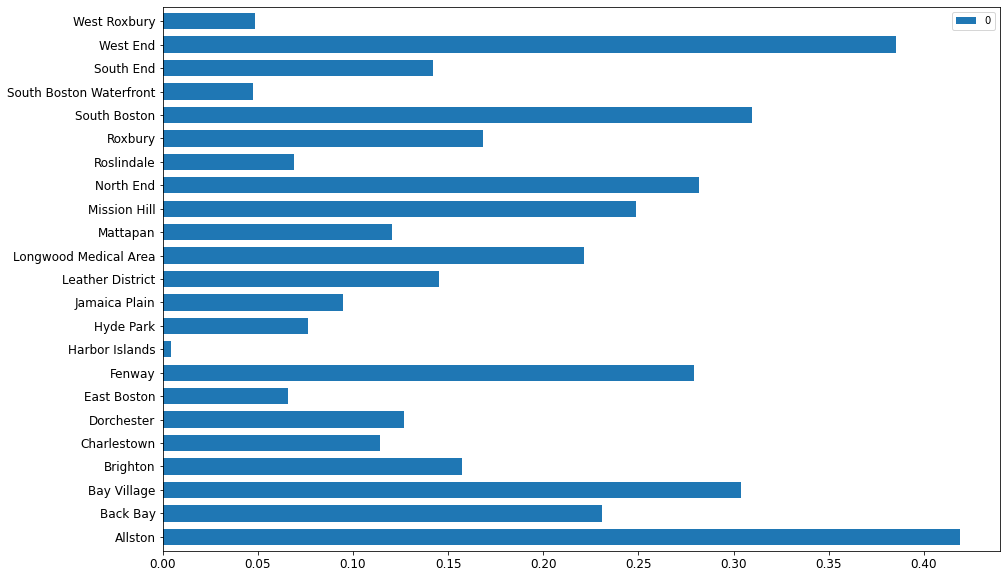

In [17]:
tmp=pd.DataFrame(normalize(df2["MedIllnes_AVER"].tolist()),index=name)
tmp.plot.barh(figsize=(15,10),fontsize="large",width=0.7)

In [19]:
df2["Child_AVER"]=df2["TotChild"]/df2["AREA_SQFT"]
df2.head()

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_AVER,HU100_RE_AVER,MedIllnes_AVER,Child_AVER
Name,,,,,,,,,,,,,,,,,
Allston,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082,0.001688,0.000850,0.000630,0.000038
Back Bay,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486,0.000840,0.000539,0.000347,0.000049
Bay Village,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535,0.001155,0.000541,0.000457,0.000133
Brighton,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776,0.000600,0.000268,0.000236,0.000042
Charlestown,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687,0.000436,0.000229,0.000171,0.000088


In [20]:
df2["Child_AVER"].nlargest(3)

Name
South Boston    0.000180
Roxbury         0.000175
Bay Village     0.000133
Name: Child_AVER, dtype: float64

<AxesSubplot:>

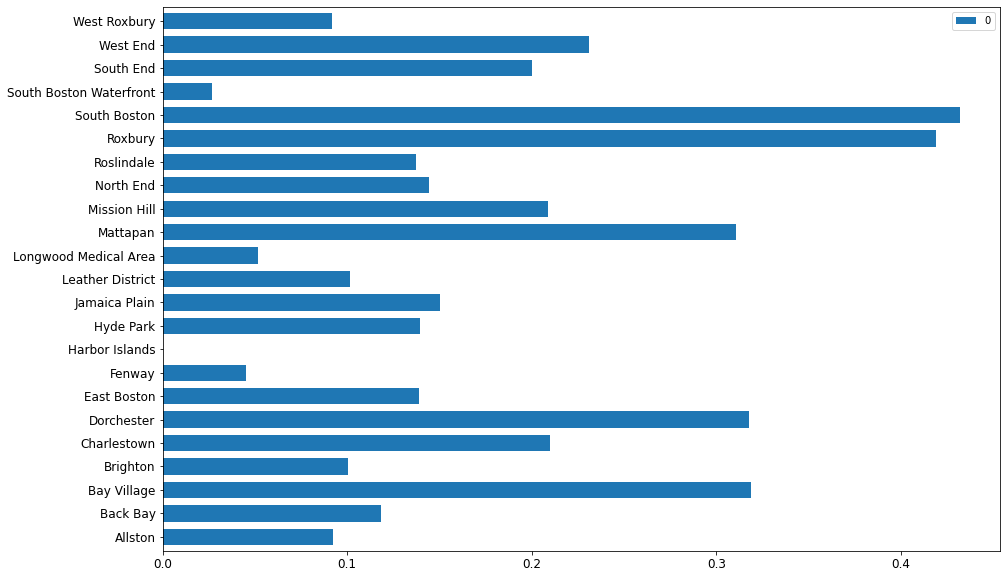

In [21]:
tmp=pd.DataFrame(normalize(df2["Child_AVER"].tolist()),index=name)
tmp.plot.barh(figsize=(15,10),fontsize="large",width=0.7) 

In [22]:
df2["OlderAdult_AVER"]=df2["OlderAdult"]/df2["AREA_SQFT"]
df2.head()

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_AVER,HU100_RE_AVER,MedIllnes_AVER,Child_AVER,OlderAdult_AVER
Name,,,,,,,,,,,,,,,,,,
Allston,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082,0.001688,0.000850,0.000630,0.000038,0.000032
Back Bay,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486,0.000840,0.000539,0.000347,0.000049,0.000110
Bay Village,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535,0.001155,0.000541,0.000457,0.000133,0.000182
Brighton,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776,0.000600,0.000268,0.000236,0.000042,0.000058
Charlestown,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687,0.000436,0.000229,0.000171,0.000088,0.000048


In [23]:
df2["OlderAdult_AVER"].nlargest(3)

Name
Bay Village     0.000182
West End        0.000159
South Boston    0.000125
Name: OlderAdult_AVER, dtype: float64

<AxesSubplot:>

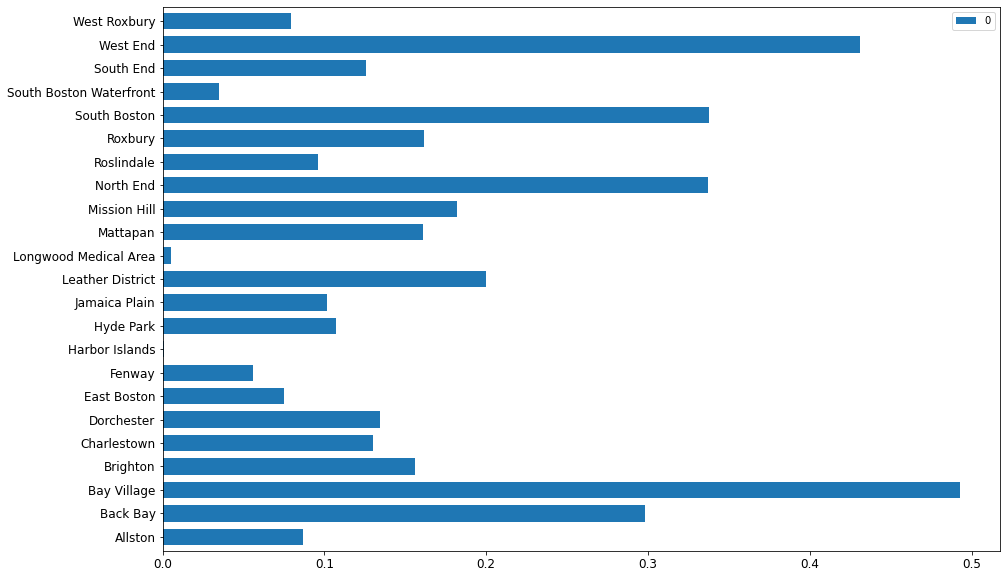

In [24]:
tmp=pd.DataFrame(normalize(df2["OlderAdult_AVER"].tolist()),index=name)
tmp.plot.barh( figsize=(15,10),fontsize="large",width=0.7) 

In [26]:
df2["TotDis_AVER"]=df2["TotDis"]/df2["AREA_SQFT"]
df2.head()

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_AVER,HU100_RE_AVER,MedIllnes_AVER,Child_AVER,OlderAdult_AVER,TotDis_AVER
Name,,,,,,,,,,,,,,,,,,,
Allston,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082,0.001688,0.000850,0.000630,0.000038,0.000032,0.000089
Back Bay,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486,0.000840,0.000539,0.000347,0.000049,0.000110,0.000055
Bay Village,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535,0.001155,0.000541,0.000457,0.000133,0.000182,0.000119
Brighton,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776,0.000600,0.000268,0.000236,0.000042,0.000058,0.000054
Charlestown,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687,0.000436,0.000229,0.000171,0.000088,0.000048,0.000041


In [27]:
df2["TotDis_AVER"].nlargest(3)

Name
Bay Village     0.000119
Roxbury         0.000113
South Boston    0.000112
Name: TotDis_AVER, dtype: float64

<AxesSubplot:>

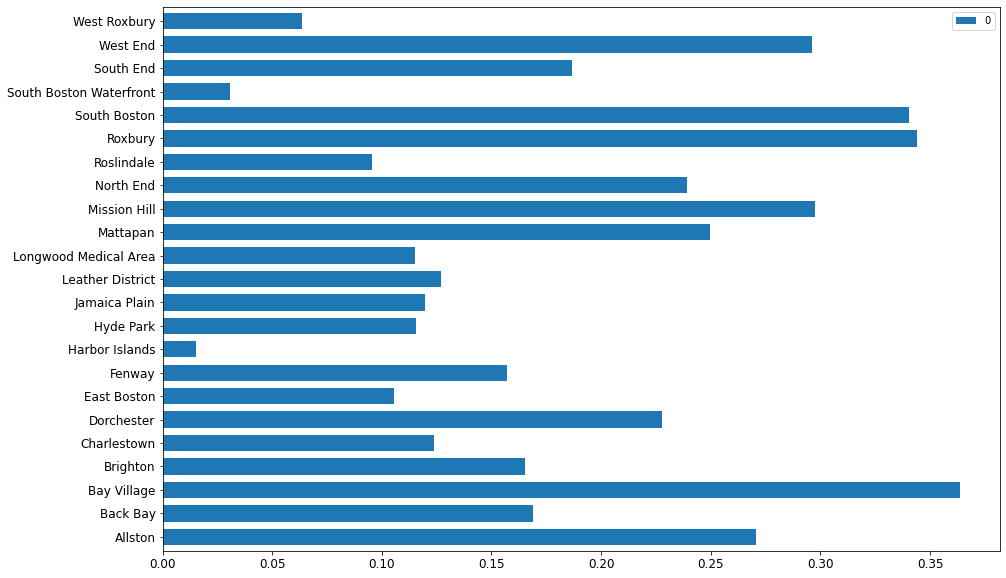

In [28]:
tmp=pd.DataFrame(normalize(df2["TotDis_AVER"].tolist()),index=name)
tmp.plot.barh(figsize=(15,10),fontsize="large",width=0.7) 

In [29]:
df2["Low_to_No_AVER"]=df2["Low_to_No"]/df2["AREA_SQFT"]
df2.head()

,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_AVER,HU100_RE_AVER,MedIllnes_AVER,Child_AVER,OlderAdult_AVER,TotDis_AVER,Low_to_No_AVER
Name,,,,,,,,,,,,,,,,,,,,
Allston,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082,0.001688,0.000850,0.000630,0.000038,0.000032,0.000089,0.000734
Back Bay,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486,0.000840,0.000539,0.000347,0.000049,0.000110,0.000055,0.000156
Bay Village,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535,0.001155,0.000541,0.000457,0.000133,0.000182,0.000119,0.000418
Brighton,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776,0.000600,0.000268,0.000236,0.000042,0.000058,0.000054,0.000168
Charlestown,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687,0.000436,0.000229,0.000171,0.000088,0.000048,0.000041,0.000110


In [30]:
df2["Low_to_No_AVER"].nlargest(3)

Name
Allston         0.000734
Bay Village     0.000418
Mission Hill    0.000392
Name: Low_to_No_AVER, dtype: float64

<AxesSubplot:>

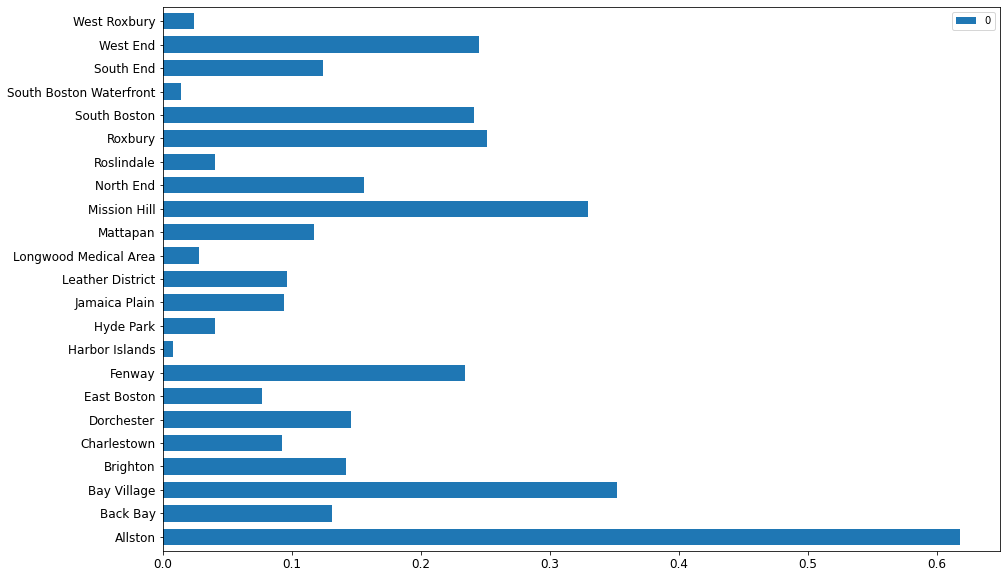

In [31]:
tmp=pd.DataFrame(normalize(df2["Low_to_No_AVER"].tolist()),index=name)
tmp.plot.barh(figsize=(15,10),fontsize="large",width=0.7) 

<AxesSubplot:xlabel='Name'>

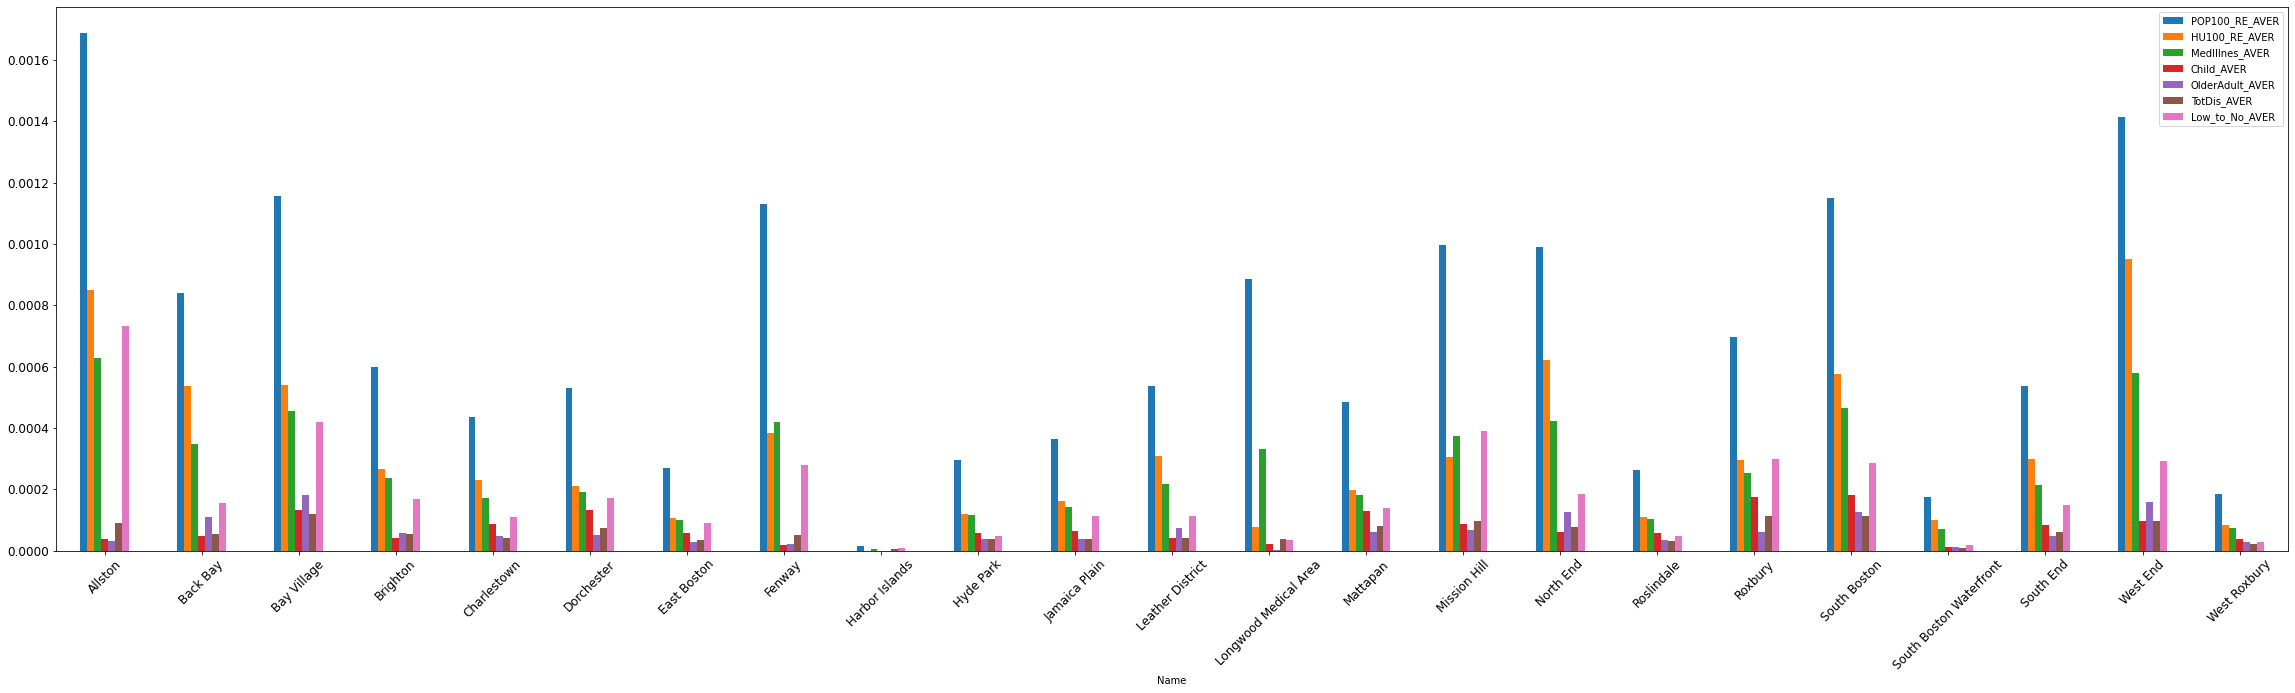

In [120]:
df2.loc[:,["POP100_RE_AVER","HU100_RE_AVER","MedIllnes_AVER","Child_AVER","OlderAdult_AVER","TotDis_AVER","Low_to_No_AVER"]].plot.bar(rot=45, figsize=(40, 10),fontsize="large")


<AxesSubplot:xlabel='Name'>

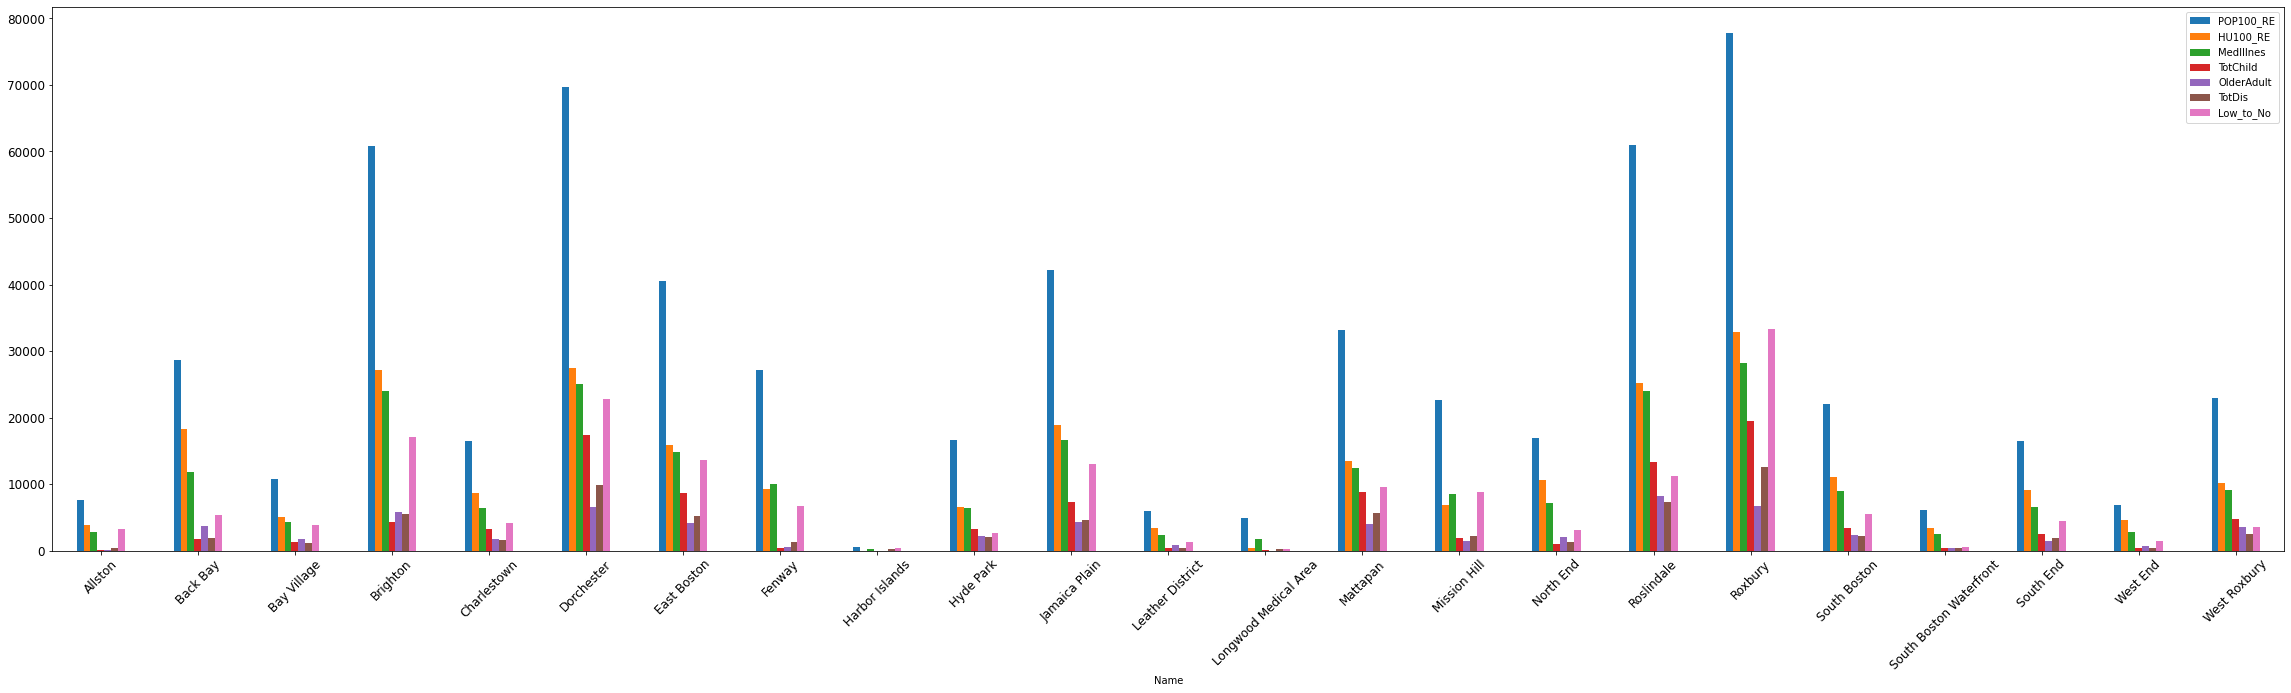

In [121]:
df2.loc[:,["POP100_RE","HU100_RE","MedIllnes","TotChild","OlderAdult","TotDis","Low_to_No"]].plot.bar(rot=45, figsize=(40, 10),fontsize="large")


<AxesSubplot:xlabel='Name'>

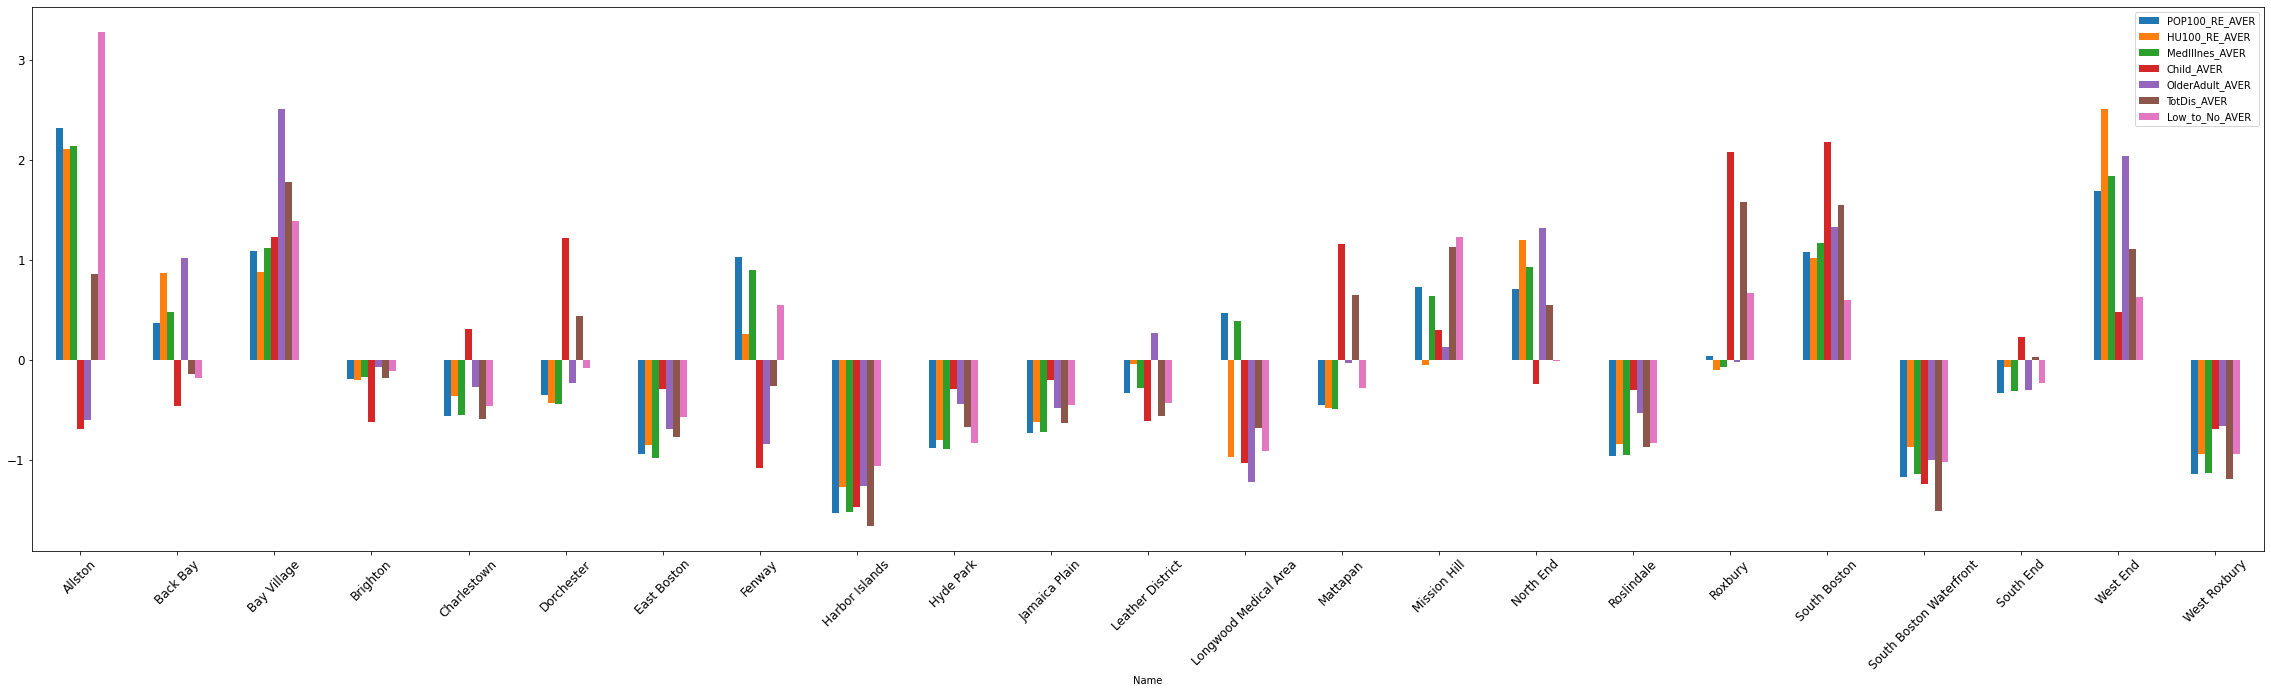

In [32]:
std_norm_df=(df2-df2.mean())/df2.std()
std_norm_df.loc[:,["POP100_RE_AVER","HU100_RE_AVER","MedIllnes_AVER","Child_AVER","OlderAdult_AVER","TotDis_AVER","Low_to_No_AVER"]].plot.bar(rot=45, figsize=(40, 10),fontsize="large")


<AxesSubplot:xlabel='Name'>

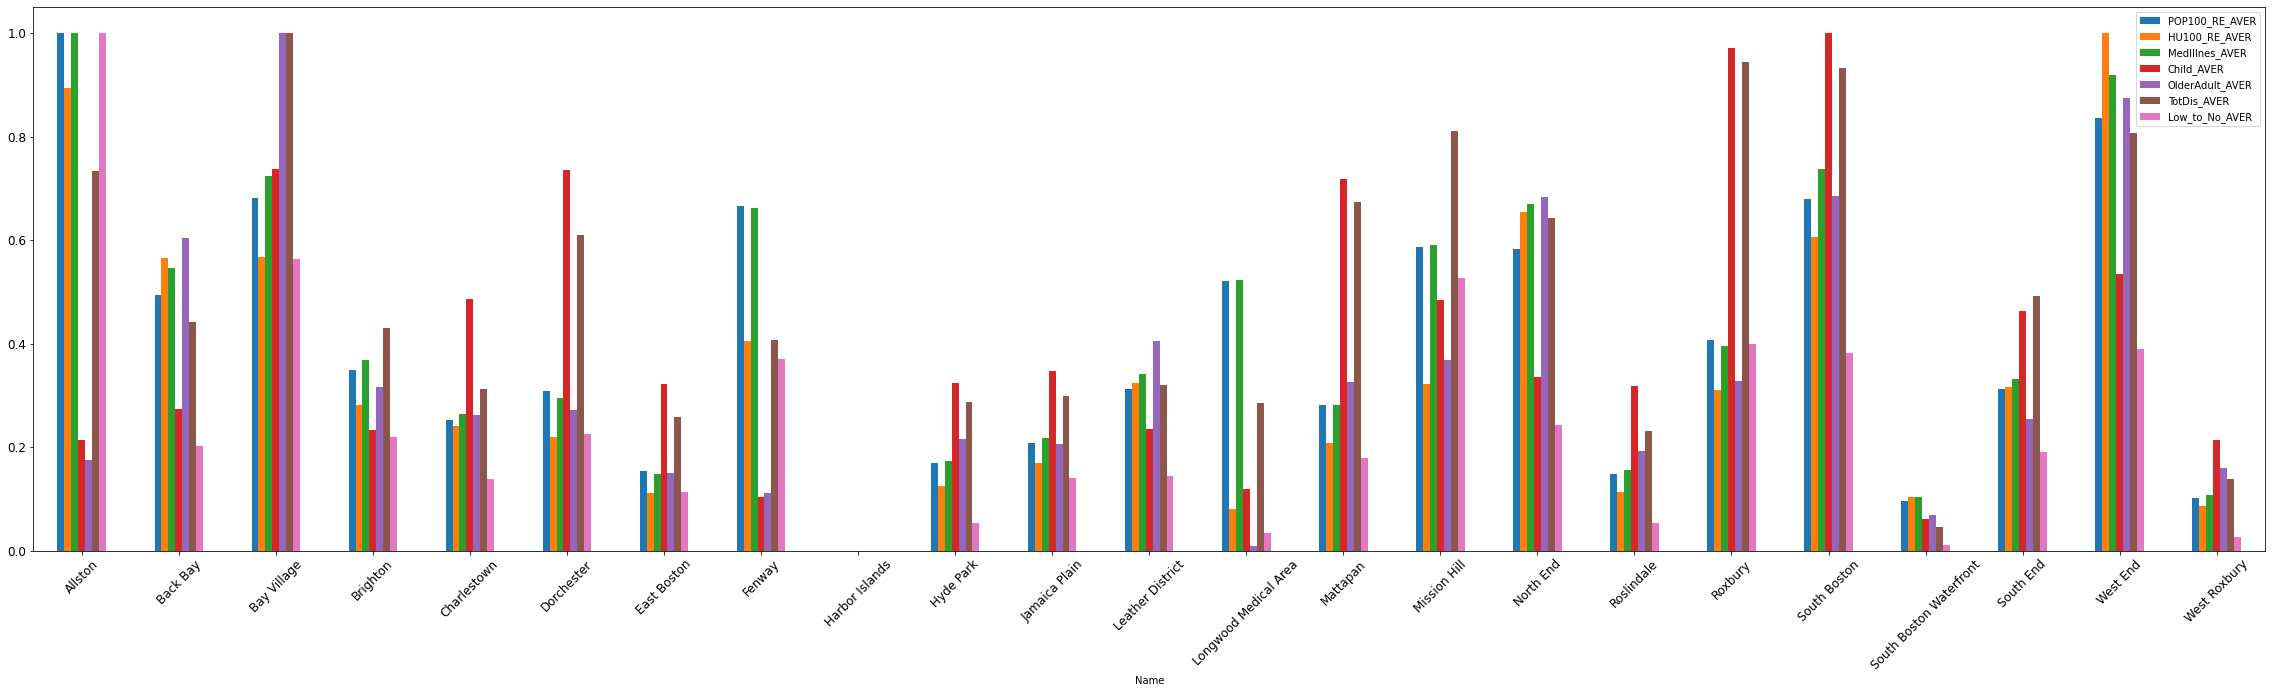

In [33]:
mm_norm_df=(df2-df2.min())/(df2.max()-df2.min())
mm_norm_df.loc[:,["POP100_RE_AVER","HU100_RE_AVER","MedIllnes_AVER","Child_AVER","OlderAdult_AVER","TotDis_AVER","Low_to_No_AVER"]].plot.bar(rot=45, figsize=(40, 10),fontsize="large")
